<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/FinTech_2_Basic_Technical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

In [1]:
from datetime import datetime
import pytz
print('Tested on ',datetime.now(pytz.timezone('Asia/Calcutta')))
!python --version
!lsb_release -a

Tested on  2023-12-01 14:41:18.879628+05:30
Python 3.10.12
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy


#Getting Historical Stock Market Data / BSE <br>
What is a stock? Why is it important? [Read here](https://docs.google.com/presentation/d/1eRLBw2ATwJSa8qFu0YUUNIayAL2Mogm-Q6LljTHM4S4/edit?usp=sharing) <br>
NSE Data is available here #NSE Data is available at https://www.nseindia.com/products/content/equities/equities/eq_security.htm <br> For symbols like BHARTIARTL, LT, HULV, HDFC etc <br>

or BSE Site BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0 <br>

![alt text](https://github.com/Praxis-QR/FDS/raw/main/images/BSEHistoricData.png)<br>


Index data is available here https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm <br>
BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0




##Load BSE Data in CSV format

In [2]:
import pandas as pd
pd.to_datetime('today').strftime('%d %B %Y')

'01 December 2023'

In [3]:
!wget -q -O bharti.csv https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/BSE_Bharti-2020-2022.csv
!wget -q -O hulv.csv https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/BSE_HULV-2020-2022.csv
!wget -q -O lnto.csv https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/BSE_LNT-2020-2022.csv
!wget -q -O hdfc.csv https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/BSE_HDFC-2020-2022.csv

In [4]:
#df = pd.read_csv('bharti.csv')
#df['Date'] = pd.to_datetime(df['Date'])
#df.sort_values('Date', axis = 0, inplace = True)
#df.set_index('Date',inplace=True)
#df

In [5]:
def BSEcsv2df(fileName):
    df = pd.read_csv(fileName, delimiter =',')
    df['Date'] = pd.to_datetime(df['Date'])
    dropColumns = [ 'WAP',  'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low', 'Spread Close-Open']
    df.drop(dropColumns, axis =1, inplace = True)
    df = df.rename(columns ={'Open Price':'Open','High Price':'High', 'Low Price':'Low','Close Price':'Close','Total Turnover (Rs.)':'Turnover'})
    #df = df.loc[::-1]                                                # clever way to reverse the order of rows, however we are using the sort
    df.sort_values('Date', axis = 0, inplace = True)
    df.set_index('Date',inplace=True)
    return df

#Basic Charts

## One Company

In [6]:
dfBharti = BSEcsv2df('bharti.csv')
dfBharti.head()

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2019-12-31,460.65,462.45,454.50,455.8,174810,2535,80242976.0
2020-01-01,458.00,460.25,449.80,453.3,178352,2266,81001111.0
2020-01-02,454.00,459.35,453.65,455.0,125575,1688,57206744.0
2020-01-03,455.00,459.15,451.70,455.0,147522,1942,67115198.0
2020-01-06,457.00,457.40,444.85,449.5,200439,2943,90156537.0


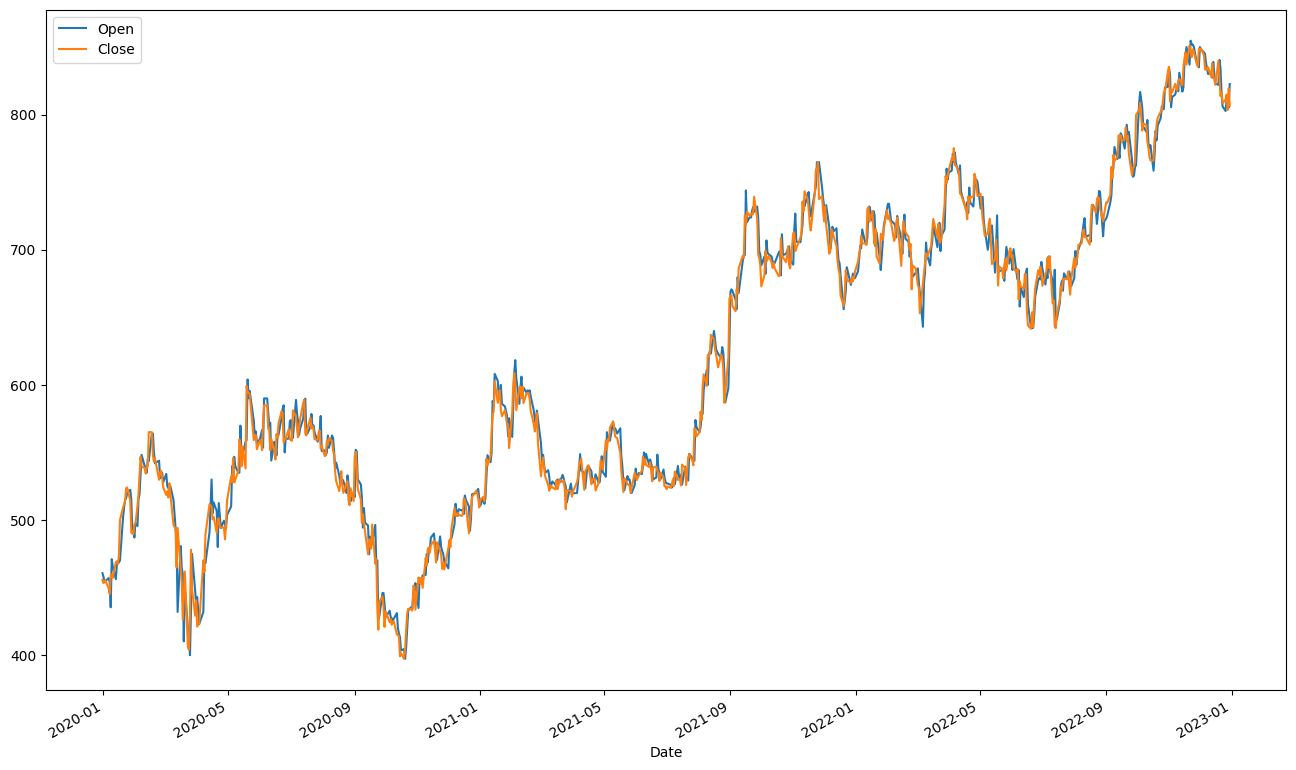

In [7]:
dfBharti.plot(y = ['Open','Close'],figsize = (16,10));

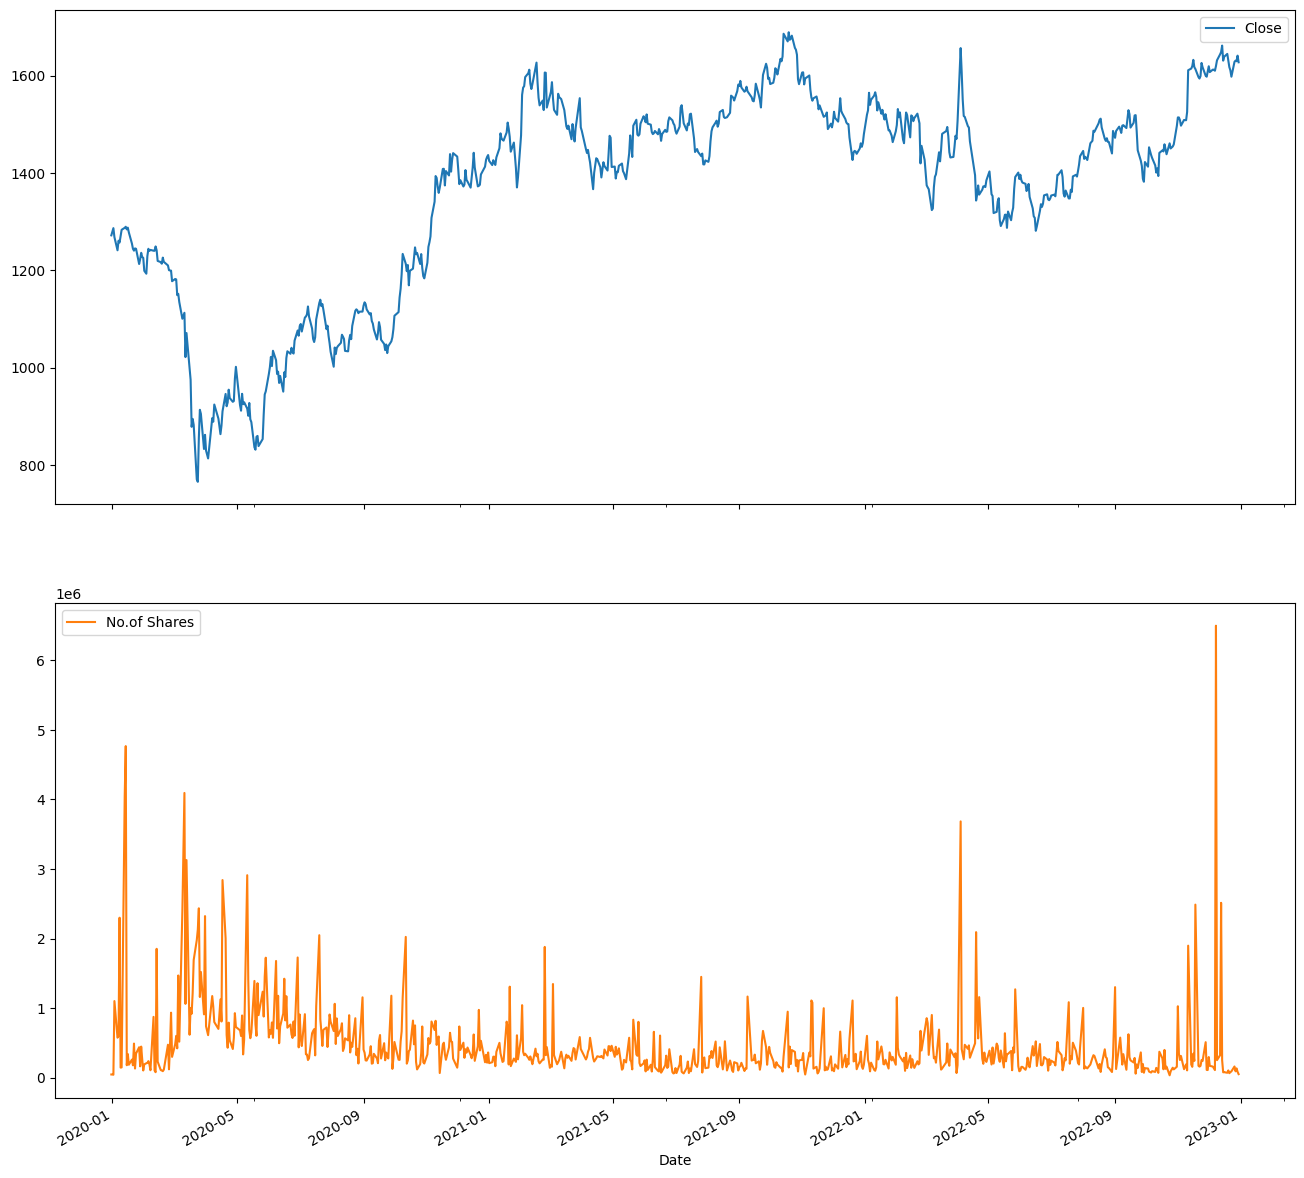

In [8]:
dfhdfc = BSEcsv2df('hdfc.csv')
dfhdfc.plot(y = ['Close','No.of Shares'],figsize = (16,16), subplots=True);

In [9]:
print(list(dfBharti.columns))

['Open', 'High', 'Low', 'Close', 'No.of Shares', 'No. of Trades', 'Turnover']


##Compare Two Companies

In [10]:
dfHDFC = BSEcsv2df('hdfc.csv')
dfHDFC.head(2)

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2019-12-31,1286.8,1286.8,1269.0,1271.80,45369,3413,57761244.0
2020-01-01,1275.0,1280.4,1271.0,1279.05,44876,2304,57316403.0


In [11]:
dfHUL = BSEcsv2df('hulv.csv')
dfHUL.head(2)

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2019-12-31,1944.0,1946.40,1920.00,1923.25,24906,1980,48176705.0
2020-01-01,1931.0,1939.75,1918.25,1936.75,18752,1909,36247928.0


In [12]:
df2Com = pd.merge(dfHDFC[['Close']],dfHUL[['Close']],on='Date')
df2Com.head(2)

,Close_x,Close_y
Date,,
2019-12-31,1271.80,1923.25
2020-01-01,1279.05,1936.75


In [13]:
df2Com = df2Com.rename(columns ={'Close_x':'HDFC','Close_y':'HUL'})
df2Com.head(2)

,HDFC,HUL
Date,,
2019-12-31,1271.80,1923.25
2020-01-01,1279.05,1936.75


In [14]:
startDate = pd.to_datetime(df2Com.index[0]).strftime('%d/%m/%Y')
endDate = pd.to_datetime(df2Com.index[-1]).strftime('%d/%m/%Y')
print(startDate, endDate)

31/12/2019 30/12/2022


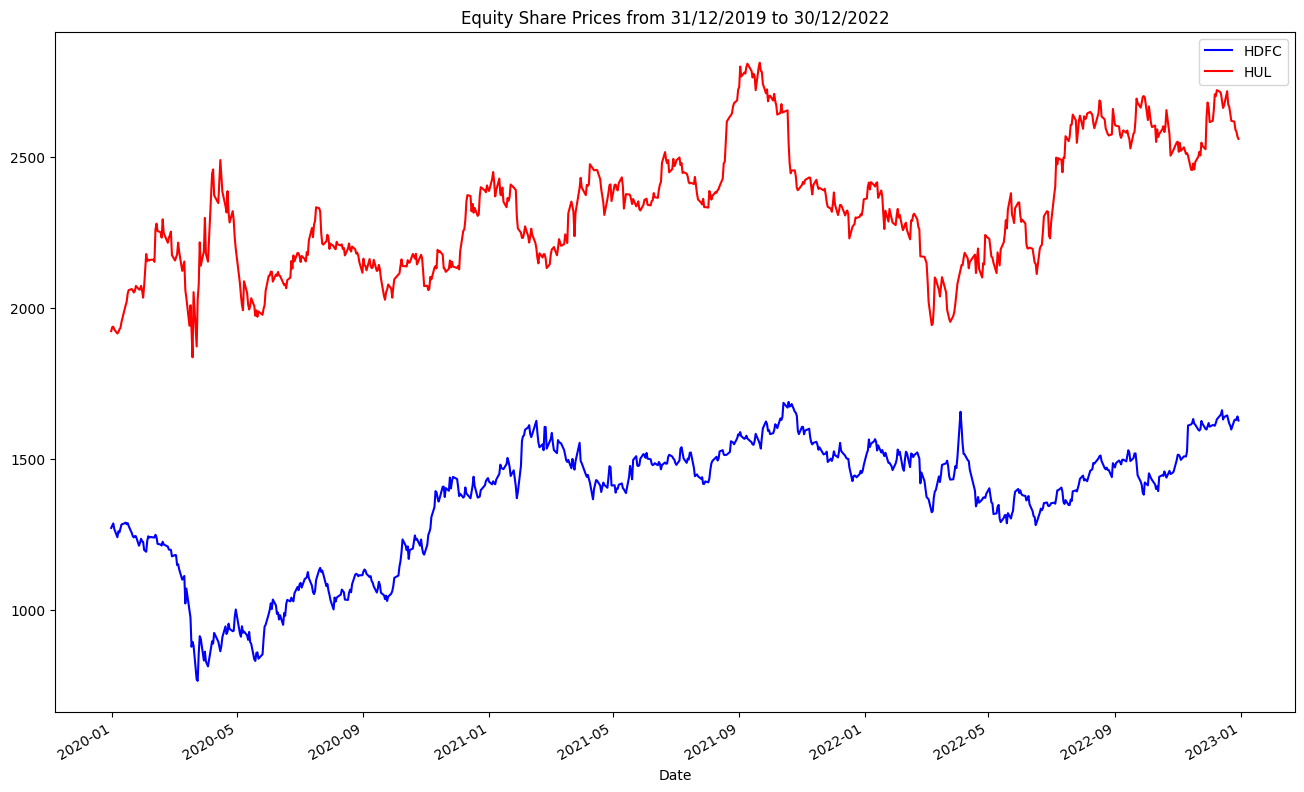

In [15]:
# Plotting directly from DataFrames with Pandas
plotTitle = 'Equity Share Prices from '+ startDate+ ' to '+endDate
df2Com.plot(y =['HDFC', 'HUL'], kind='line', color=['blue','red'], figsize=(16,10), title=plotTitle );



##Compare Three Companies

In [16]:
dfLNTO = BSEcsv2df('lnto.csv')
dfLNTO.head(2)

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2019-12-31,1302.0,1310.20,1291.30,1298.95,99791,4841,129740314.0
2020-01-01,1310.0,1318.45,1303.35,1310.10,154714,6663,202668026.0


In [17]:
df3Com = pd.merge(df2Com[['HDFC','HUL']],dfLNTO[['Close']],on='Date')
df3Com.head(2)

,HDFC,HUL,Close
Date,,,
2019-12-31,1271.80,1923.25,1298.95
2020-01-01,1279.05,1936.75,1310.10


In [18]:
df3Com = df3Com.rename(columns ={'Close':'L&T'})
df3Com.head(2)

,HDFC,HUL,L&T
Date,,,
2019-12-31,1271.80,1923.25,1298.95
2020-01-01,1279.05,1936.75,1310.10


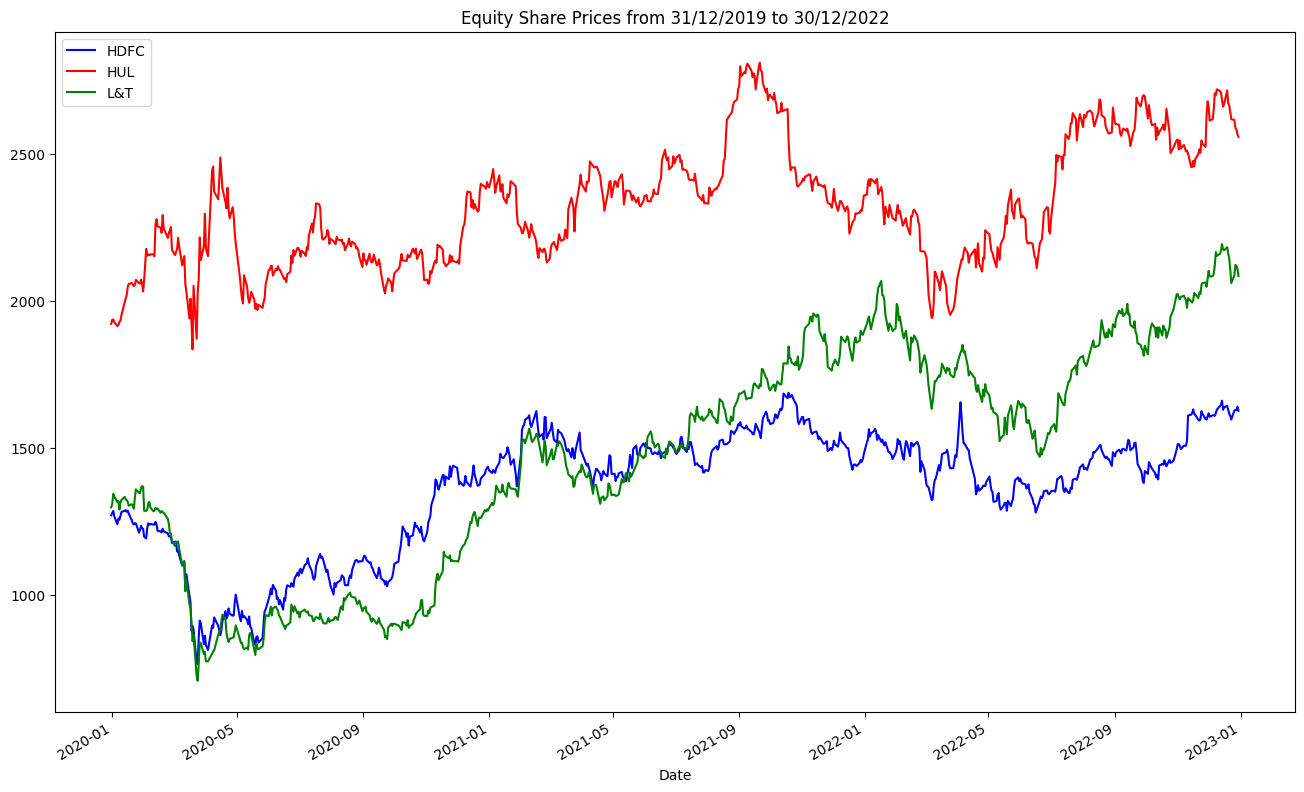

In [19]:
# Plotting directly from DataFrames with Pandas
plotTitle = 'Equity Share Prices from '+ startDate+ ' to '+endDate
df3Com.plot(y=['HDFC', 'HUL', 'L&T'], kind='line', color=['blue','red', 'green'], figsize=(16,10), title=plotTitle);


#Scaling the Data

In [20]:
df = df3Com.copy()
df.head()

,HDFC,HUL,L&T
Date,,,
2019-12-31,1271.80,1923.25,1298.95
2020-01-01,1279.05,1936.75,1310.10
2020-01-02,1286.65,1938.15,1345.00
2020-01-03,1268.10,1928.75,1335.15
2020-01-06,1241.15,1915.55,1316.30


In [21]:
df['HDFC'] = df['HDFC']/df['HDFC'][0]
df['HUL'] = df['HUL']/df['HUL'][0]
df['L&T'] = df['L&T']/df['L&T'][0]
df.head(10)

,HDFC,HUL,L&T
Date,,,
2019-12-31,1.000000,1.000000,1.000000
2020-01-01,1.005701,1.007019,1.008584
2020-01-02,1.011676,1.007747,1.035452
2020-01-03,0.997091,1.002860,1.027869
2020-01-06,0.975900,0.995996,1.013357
2020-01-07,0.991390,0.998388,1.016398
2020-01-08,0.988402,1.003146,0.994149
2020-01-09,0.999214,1.005797,1.013049
2020-01-10,1.008964,1.015859,1.019323


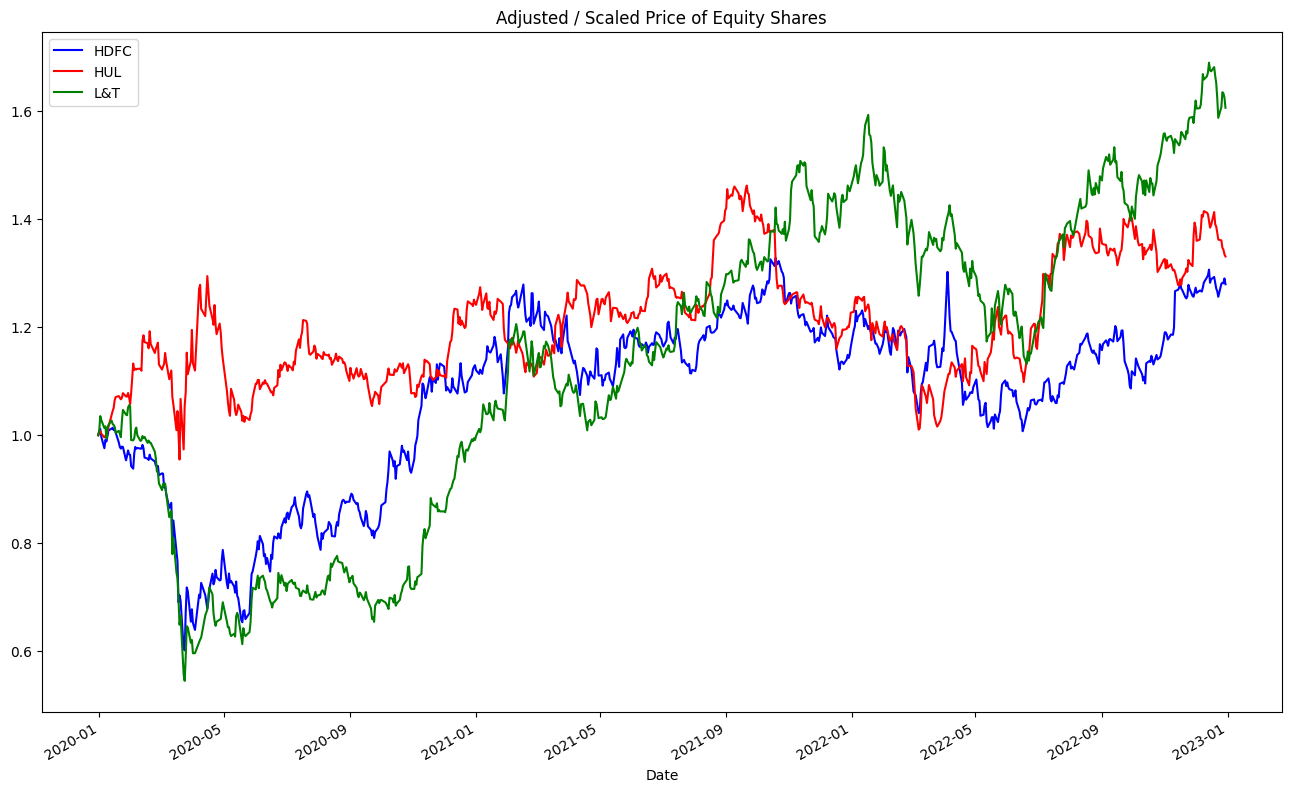

In [22]:
# Plotting directly from DataFrames with Pandas
plotTitle = 'Adjusted / Scaled Price of Equity Shares'
df.plot(y=['HDFC', 'HUL', 'L&T'], kind='line', color=['blue','red', 'green'], figsize=(16,10), title=plotTitle);

#Simple Moving Average

In [23]:
df = BSEcsv2df('hulv.csv')
df.head(2)

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2019-12-31,1944.0,1946.40,1920.00,1923.25,24906,1980,48176705.0
2020-01-01,1931.0,1939.75,1918.25,1936.75,18752,1909,36247928.0


In [24]:
#df.columns
dropCols = ['Turnover', 'No. of Trades']
df.drop(dropCols, axis=1, inplace=True)
df.rename(columns={'No.of Shares':'Volume'}, inplace=True)
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,1944.0,1946.40,1920.00,1923.25,24906
2020-01-01,1931.0,1939.75,1918.25,1936.75,18752
2020-01-02,1940.0,1952.25,1930.50,1938.15,22748


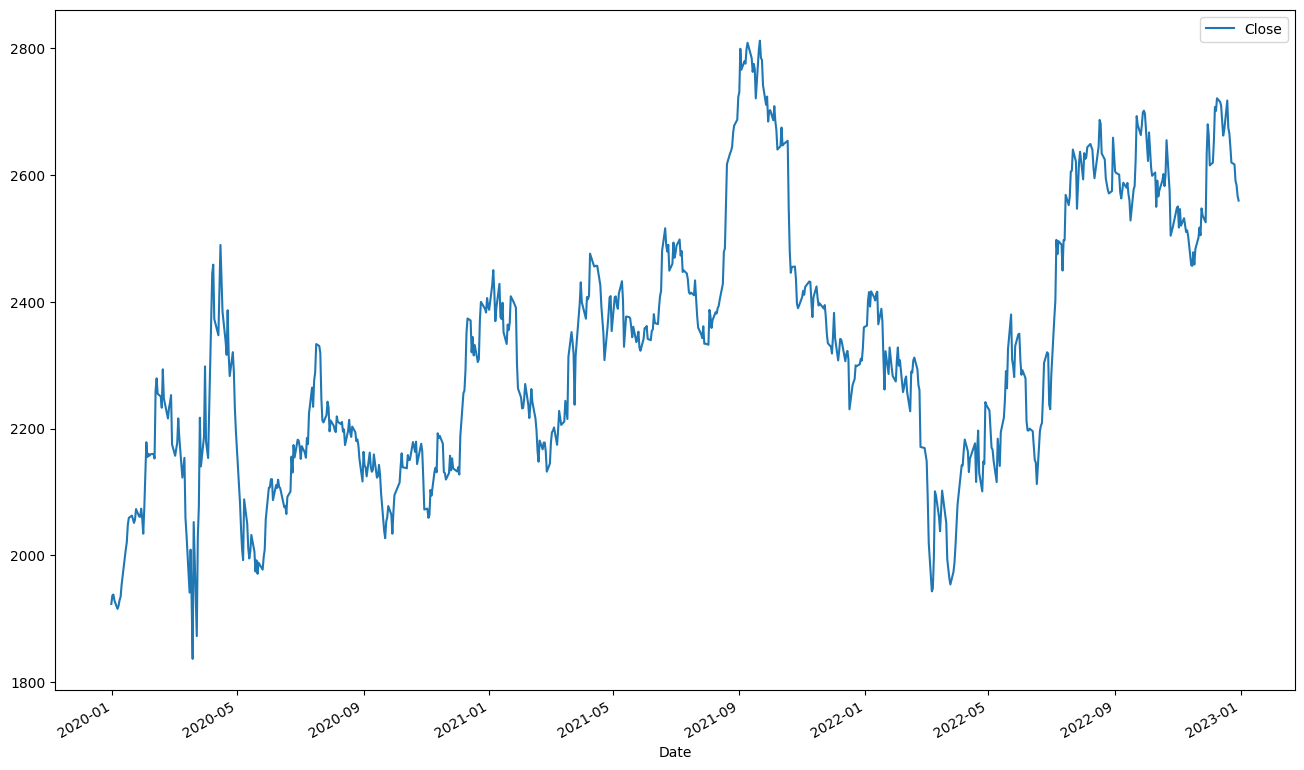

In [25]:
df.plot(y='Close', figsize=(16,10));



In [26]:
df['SMA10'] = df['Close'].rolling(10).mean()
df['SMA30'] = df['Close'].rolling(30).mean()
#df.tail()
#df.head(40)
df.count()

Open      749
High      749
Low       749
Close     749
Volume    749
SMA10     740
SMA30     720
dtype: int64

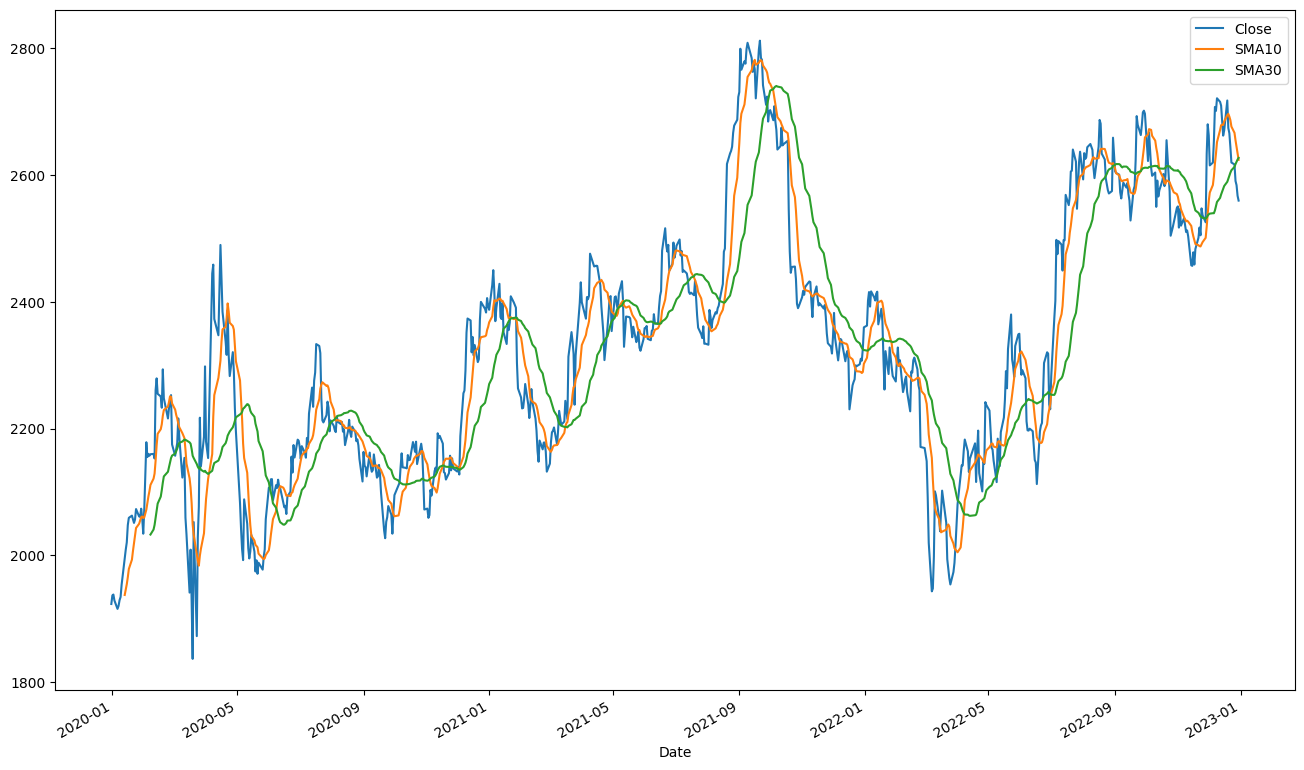

In [27]:
df.plot(y=['Close','SMA10','SMA30'], figsize=(16,10));



#Bollinger Bands
https://www.investopedia.com/terms/b/bollingerbands.asp

In [28]:
df = BSEcsv2df('hulv.csv')[['Open','High','Low','Close', 'No.of Shares']]
df = df.rename(columns ={'No.of Shares':'Volume'})
df.sample(5)

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-13,2131.10,2152.00,2127.05,2137.25,67642
2021-07-07,2469.80,2490.00,2446.80,2480.05,41388
2021-08-24,2622.15,2657.75,2610.15,2638.10,70484
2020-12-14,2384.00,2391.00,2357.25,2370.60,59226
2022-02-15,2236.00,2304.05,2225.00,2289.95,57718


In [29]:
n = 20                              # smoothing period  30
m = 2                               # number of sigmas
df['TP'] = ((df['High']+df['Low']+df['Close'])/3).round(decimals = 2)
df['MAvg'] = df['TP'].rolling(n).mean().round(decimals = 2)
df['MSig'] = df['TP'].rolling(n).std().round(decimals = 2)
df['bolU'] = df['MAvg'] + m * df['MSig']
df['bolL'] = df['MAvg'] - m * df['MSig']
df.sample(5)

,Open,High,Low,Close,Volume,TP,MAvg,MSig,bolU,bolL
Date,,,,,,,,,,
2021-02-19,2150.0,2193.65,2148.00,2181.15,150398,2174.27,2259.31,70.37,2400.05,2118.57
2022-07-05,2380.0,2411.00,2372.45,2401.50,39491,2394.98,2229.48,71.07,2371.62,2087.34
2020-02-10,2159.6,2188.40,2151.65,2160.05,38387,2166.70,2086.73,51.94,2190.61,1982.85
2022-06-24,2255.0,2318.00,2255.00,2303.55,156968,2292.18,2229.72,68.31,2366.34,2093.10
2022-01-27,2327.5,2327.50,2275.85,2296.50,107654,2299.95,2360.55,46.61,2453.77,2267.33


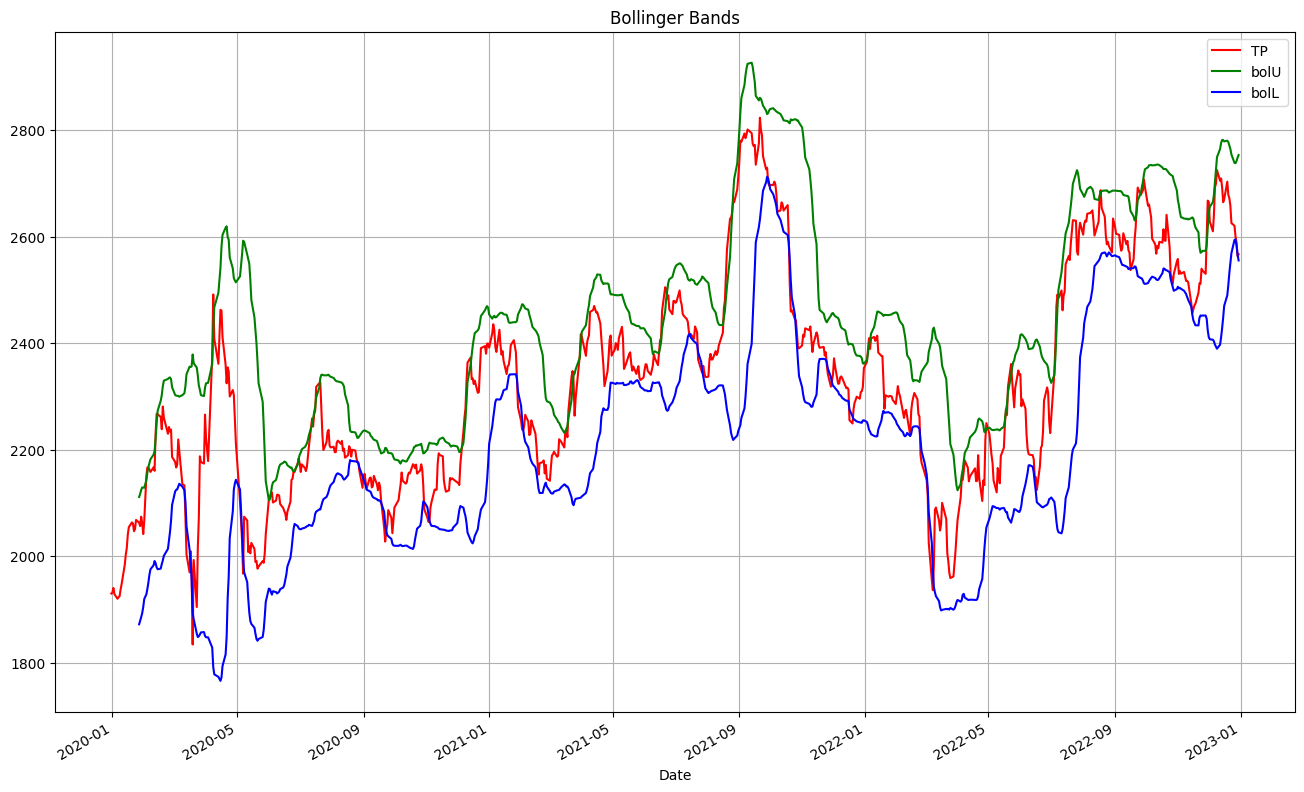

In [30]:
df.plot(y=['TP','bolU','bolL'], figsize = (16,10), color = ['red','green','blue'], grid = True, title = 'Bollinger Bands');

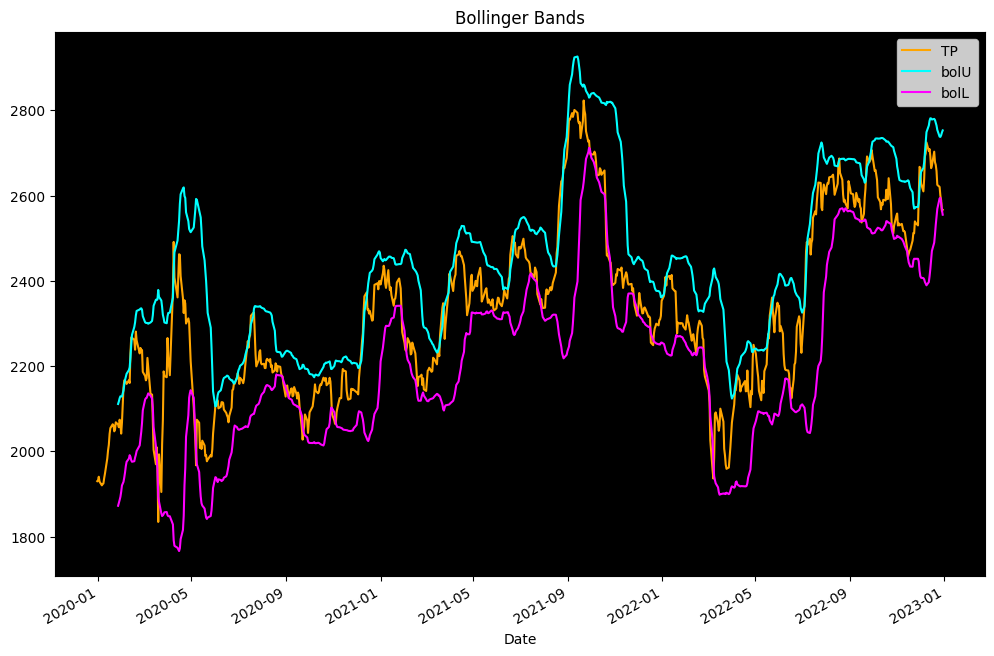

In [31]:
df.plot(y=['TP','bolU','bolL'],\
        figsize = (12,8),\
        color = ['orange','cyan','magenta'],\
        grid = False,\
        title = 'Bollinger Bands').\
        set_facecolor('black');

#Technical Charts

In [32]:
!pip install mplfinance > /dev/null
#
# https://github.com/matplotlib/mplfinance#usage
#
import mplfinance as mpf

In [33]:
df = BSEcsv2df('hdfc.csv')
df.head()

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2019-12-31,1286.8,1286.8,1269.0,1271.80,45369,3413,5.776124e+07
2020-01-01,1275.0,1280.4,1271.0,1279.05,44876,2304,5.731640e+07
2020-01-02,1278.0,1287.9,1277.5,1286.65,41084,2219,5.277925e+07
2020-01-03,1289.0,1289.0,1263.0,1268.10,1100857,5701,1.399249e+09
2020-01-06,1265.8,1265.8,1236.0,1241.15,574250,8176,7.187758e+08


In [34]:
#df.columns
dropCols = ['Turnover', 'No. of Trades']
df.drop(dropCols, axis=1, inplace=True)
df.rename(columns={'No.of Shares':'Volume'}, inplace=True)
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,1286.8,1286.8,1269.0,1271.80,45369
2020-01-01,1275.0,1280.4,1271.0,1279.05,44876
2020-01-02,1278.0,1287.9,1277.5,1286.65,41084


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


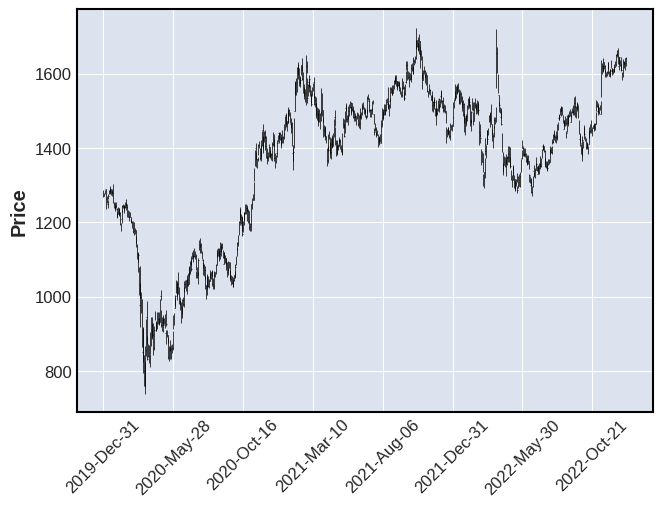

In [35]:
#very basic usage
mpf.plot(df)

In [36]:
#df.loc['2020-01-01':'2020-12-31']

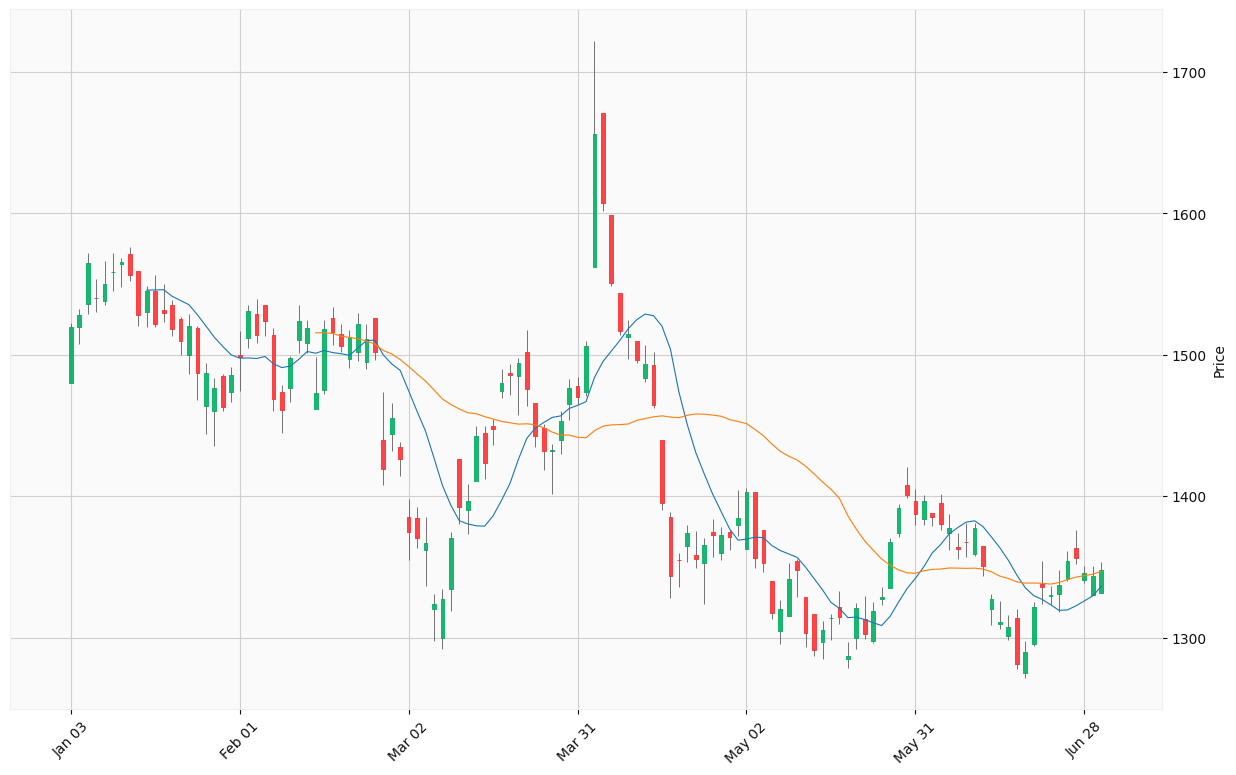

In [37]:
#add moving average and candles
mpf.plot(df.loc['2022-01-01':'2022-06-30'], type='candle',mav=(10,30), style='yahoo', figsize = (16,10))

In [38]:
n = 20                              # smoothing period  30
m = 2                               # number of sigmas
df['TP'] = ((df['High']+df['Low']+df['Close'])/3).round(decimals = 2)
df['MAvg'] = df['TP'].rolling(n).mean().round(decimals = 2)
df['MSig'] = df['TP'].rolling(n).std().round(decimals = 2)
df['bolU'] = df['MAvg'] + m * df['MSig']
df['bolL'] = df['MAvg'] - m * df['MSig']
df.sample(5)

,Open,High,Low,Close,Volume,TP,MAvg,MSig,bolU,bolL
Date,,,,,,,,,,
2020-05-06,919.70,950.00,905.00,946.30,893645,933.77,919.90,37.73,995.36,844.44
2021-01-18,1472.80,1503.00,1467.95,1483.20,804650,1484.72,1429.50,33.19,1495.88,1363.12
2022-11-09,1508.55,1516.25,1503.60,1508.25,190760,1509.37,1463.02,37.63,1538.28,1387.76
2022-09-12,1498.00,1503.85,1489.90,1492.20,113287,1495.32,1483.02,17.05,1517.12,1448.92
2020-01-07,1258.30,1271.75,1252.20,1260.85,594878,1261.60,NaN,NaN,NaN,NaN


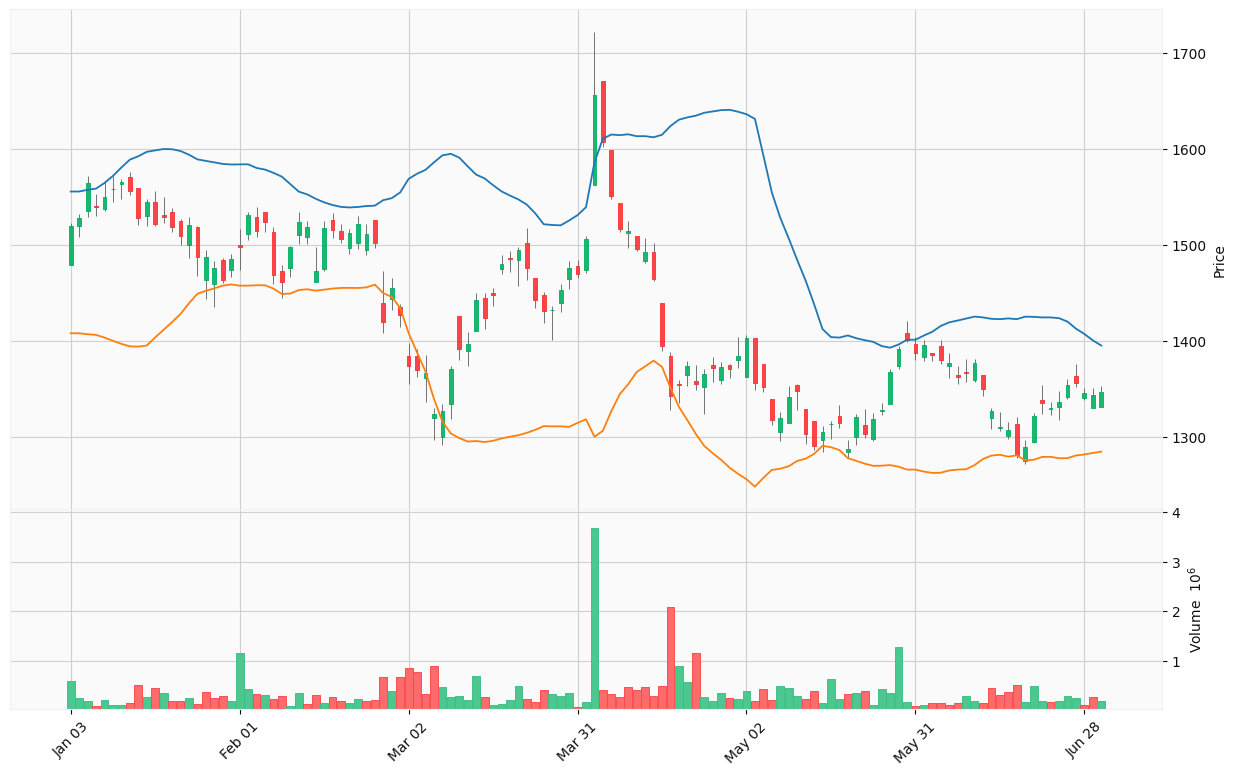

In [39]:
apd = mpf.make_addplot(df.loc['2022-01-01':'2022-06-30'][['bolU', 'bolL']])
mpf.plot(df.loc['2022-01-01':'2022-06-30'], type='candle', addplot=apd, volume=True,style='yahoo', figsize = (16,10))

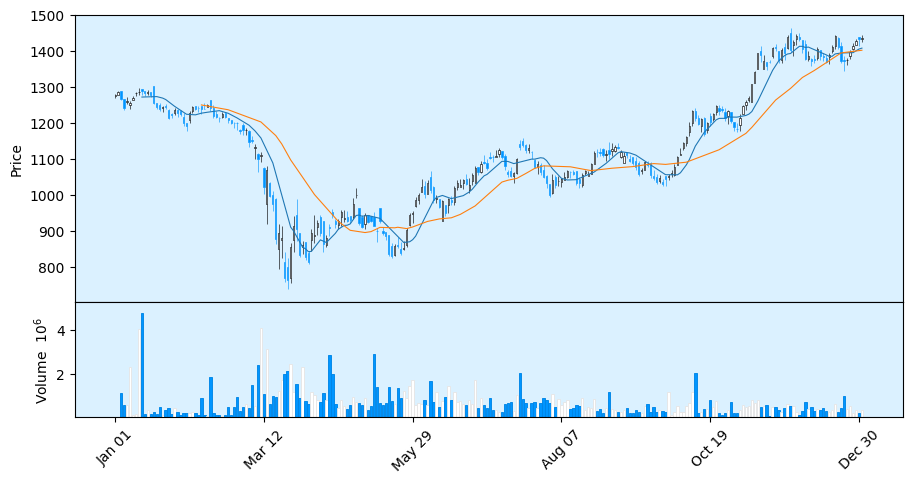

In [40]:
#add volume
mpf.plot(df.loc['2020-01-01':'2020-12-31'], type='candle',mav=(10,30), style='blueskies', volume=True,figratio=(20,10))

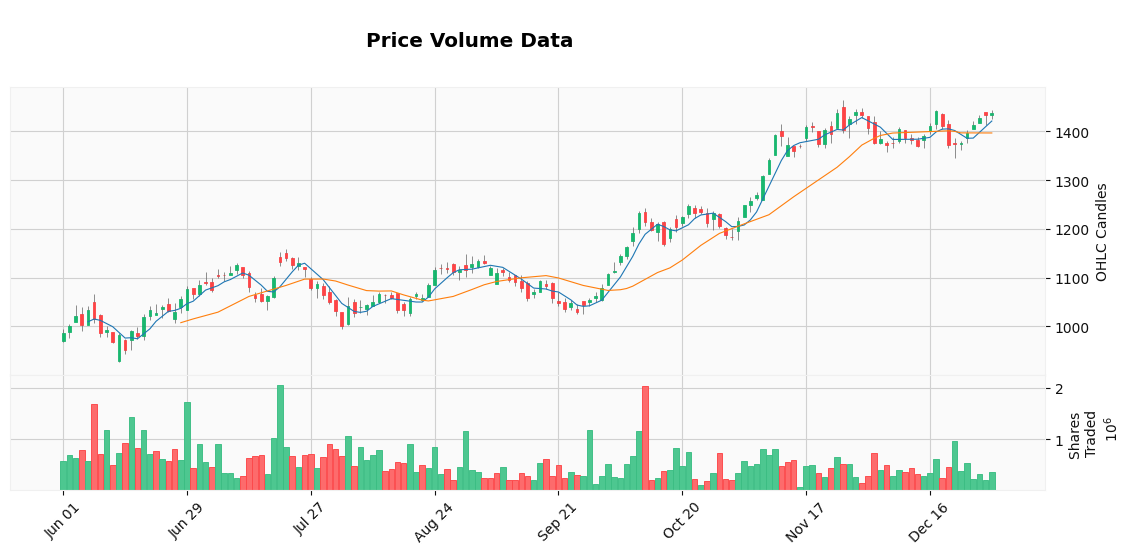

In [41]:
mpf.plot(df.loc['2020-06-01':'2020-12-31'], type='candle',
         style='yahoo',
         mav=(5,20),
         volume=True,
         figratio=(30,12),
         title='\nPrice Volume Data',
         ylabel='OHLC Candles',
         ylabel_lower='Shares \nTraded')

In [42]:
pd.to_datetime('today').strftime('%d %B %Y')

'01 December 2023'

#Exercise
Visit the NSE site https://www1.nseindia.com/products/content/equities/equities/eq_security.htm <br>
or BSE Site BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0 <br>

![alt text](https://github.com/Praxis-QR/FDS/raw/main/images/NSEHistoricData.png)<br>
get the data for three other companies and perform the same analysis

#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/CTCYFooter-1.png)